# Hypothesis Testing 

<b>Hypothesis testing :</b>
Hypothesis testing is an act in statistics whereby an analyst tests an assumption regarding a population parameter. Hypothesis testing is used to assess the plausibility of a hypothesis by using sample data. Such data may come from a larger population, or from a data-generating process.

<b> Null Hypothesis : </b>
The null hypothesis is a typical statistical theory which suggests that no statistical relationship and significance exists in a set of given single observed variable, between two sets of observed data and measured phenomena.

<b> Alternate Hypothesis : </b>
The alternative hypothesis is the hypothesis used in hypothesis testing that is contrary to the null hypothesis. It is usually taken to be that the observations are the result of a real effect (with some amount of chance variation superposed).



In [54]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t
import scipy.stats


In [2]:
def t_score(sample_size, sample_mean, pop_mean, sample_std):
    numerator = sample_mean - pop_mean
    denomenator = sample_std / sample_size**0.5
    return numerator / denomenator

## Understanding the Hypthoesis testing 

<b>  Q-1: Pista House selling Hyderabadi Chicken Dum biryani claims that each parcel packet has 500 grams of biryani (also mentioned on the label of packet). You are sceptic of their claims and believe that on average each packet does not contain 500 grams of biryani. How do you prove your claim? ~(Given that the population std is 50)~ <b>

Step - 1: 
 Alternate Hypothesis (Bold Claim): 
$$ H_1:\mu \neq 500 $$
 
      Null Hypothesis (Status Quo): 
$$ H_0: \mu = 500 $$

    
Step - 2: 
 <li> Collect a sample of size n = 10 
$$ [490,220,470,500,495,496,496,498,508,480] $$
    
$$  \bar{x}=465.3 $$

 
Step - 3: Compute Test Statistic: 

$$ t=\frac{\bar {x}- \mu} {s/\sqrt[2] {n}}  $$

 Step - 4: Decide significance level $ \alpha $ = 0.05

    
Step - 5.1: Apply decision rule: Two-tailed test

 $$ Accept H_1 if|t|>t_{n-1,\alpha/2} $$






In [3]:
import numpy

sample = [490,220,470,500,495,496,496,498,508,480]

x = numpy.std(sample)

print(x)

82.3918078451978


In [4]:
import statistics

In [6]:
statistics.stdev(sample)

86.84859110991829

In [7]:
alpha = 1 - 0.95

t_critical = t.ppf(1-alpha/2, df = 9)

print(t_critical)

2.2621571627409915


In [19]:
sample_size = 10
sample_mean = 465.3
pop_mean = 500
sample_std = 86.84


In [20]:
t = t_score(sample_size, sample_mean, pop_mean, sample_std)
print(t)

-1.2636001244569637


Text(465.3, 0.0007, 'x_bar')

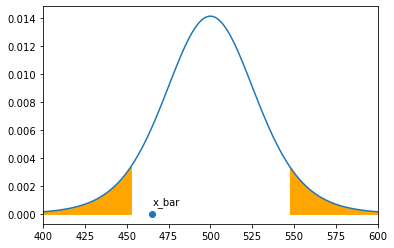

In [29]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 400
x_max = 600
df=9

# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std / sample_size**0.5


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = t.pdf(x,df=9,loc= mean, scale=std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the left and right critical values (Two tailed Test)
t_critical_left = pop_mean + (-t_critical * std)
t_critical_right = pop_mean + (t_critical * std)


# Shading the left rejection region
x1 = np.linspace(x_min, t_critical_left, 100)
y1 = t.pdf(x1,df=9,loc= mean,scale=std)
plt.fill_between(x1, y1, color='orange')


# Shading the right rejection region
x2 = np.linspace(t_critical_right, x_max, 100)
y2 = t.pdf(x2,df=9, loc=mean, scale=std)
plt.fill_between(x2, y2, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))




In [33]:
if(np.abs(t) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [39]:
# Conclusion using p test
p_value=scipy.stats.t.sf(abs(-1.33), df=9)
if (p_value<0.05):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


<b> Interpretation  :  Each packet  contain 500 grams of biryani from the Pista house.

<b>Q-2: You have developed a new Natural Language Processing Algorithms and done a user study. You claim that the average rating given by the users is greater than 4 on a scale of 1 to 5. How do you prove this to your client? ~(Given that the population std is 0.5)~<b>

Step - 1: 
 Alternate Hypothesis (Bold Claim): 
$$ H_1:\mu > 4 $$
 
      Null Hypothesis (Status Quo): 
$$ H_0: \mu \leq 4 $$

    
Step - 2: 
  Collect a sample of size n = 20 
 
 $$ [4,3,5,4,5,3,5,5,4,2,4,5,5,4,4,5,4,5,4,5] $$
    
$$  \bar{x}=4.25 $$

 
Step - 3: Compute Test Statistic: 

$$ t=\frac{\bar {x}- \mu} {s/\sqrt[2] {n}}  $$

 Step - 4: Decide significance level $ \alpha $ = 0.05

    
Step - 5.1: Apply decision rule: Right-tailed test

 $$ Accept H_1 if|t|>t_{n-1,\alpha} $$






In [5]:
a=[4,3,5,4,5,3,5,5,4,2,4,5,5,4,4,5,4,5,4,5]
sum(a)/len(a)

4.25

In [10]:
import numpy

l = [4,3,5,4,5,3,5,5,4,2,4,5,5,4,4,5,4,5,4,5]

y = numpy.std(l)

print(y)

0.82915619758885


In [11]:
import statistics

In [12]:
statistics.stdev(l)

0.8506963092234007

In [37]:
alpha = 1 - 0.95

t_critical = t.ppf(1-alpha, df = 19)

print(t_critical)

1.729132811521367


In [38]:
sample_size = 20
sample_mean = 4.25
pop_mean = 4
sample_std = 0.850


In [45]:
t = t_score(sample_size, sample_mean, pop_mean, sample_std)
print(t)

1.3153341044116411


Text(4.25, 0.01, 'x_bar')

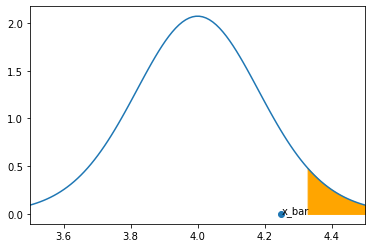

In [43]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 3.5
x_max = 4.5
df=19

# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std / sample_size**0.5


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = t.pdf(x,df=19,loc= mean, scale=std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the  right critical values (Two tailed Test)
t_critical_right = pop_mean + (t_critical * std)


# Shading the right rejection region
x2 = np.linspace(t_critical_right, x_max, 100)
y2 = t.pdf(x2,df=19, loc=mean, scale=std)
plt.fill_between(x2, y2, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.01))




In [46]:
if(np.abs(t) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [50]:
# Conclusion using p test
p_value=scipy.stats.t.sf(abs(1.34), df=19)
if (p_value<0.05):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


<b>Interpretation : The average rating given by the users is less than or equal to 4 on a scale of 1 to 5.

<b>Q-3: TATA has developed a better fuel management system for the SUV segment. They claim that with this system, on average the SUV's mileage is at least 15 km/litre?~(Given that the population std is 1)~<`

Step - 1: 
 Alternate Hypothesis (Bold Claim): 
$$ H_1:\mu > 15 $$
 
      Null Hypothesis (Status Quo): 
$$ H_0: \mu \leq 15 $$

    
Step - 2: 
  Collect a sample of size n = 20 
 
 $$ [14.08,14.13,15.65,13.78,16.26,14.97,15.36,15.81,14.53,16.79,15.78,16.98,13.23,15.43,15.46,13.88,14.31,14.41,15.76,15.38] $$
    
$$  \bar{x}=15.098 $$

 
Step - 3: Compute Test Statistic: 

$$ t=\frac{\bar {x}- \mu} {s/\sqrt[2] {n}}  $$

 Step - 4: Decide significance level $ \alpha $ = 0.05

    
Step - 5.1: Apply decision rule: Right-tailed test

 $$ Accept H_1 if|t|>t_{n-1,\alpha} $$






In [21]:
a=[14.08,14.13,15.65,13.78,16.26,14.97,15.36,15.81,14.53,16.79,15.78,16.98,13.23,15.43,15.46,13.88,14.31,14.41,15.76,15.38]
sum(a)/len(a)

15.098999999999998

In [22]:
import numpy

tata = [14.08,14.13,15.65,13.78,16.26,14.97,15.36,15.81,14.53,16.79,15.78,16.98,13.23,15.43,15.46,13.88,14.31,14.41,15.76,15.38]

y = numpy.std(tata)

print(y)

0.9994043225842081


In [23]:
import statistics

In [48]:
statistics.stdev(tata)

1.0253671999517258

In [50]:
alpha = 1 - 0.95

t_critical = t.ppf(1-alpha, df = 19)

print(t_critical)

1.729132811521367


In [51]:
sample_size = 20
sample_mean = 15.098
pop_mean = 15
sample_std = 1.02


In [52]:
t = t_score(sample_size, sample_mean, pop_mean, sample_std)
print(t)

0.42967580744113937


Text(15.098, 0.01, 'x_bar')

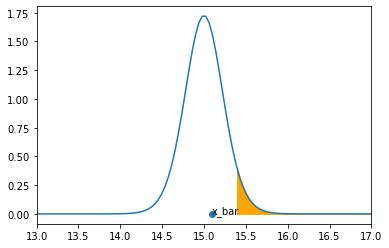

In [55]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 13
x_max = 17
df=19

# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std / sample_size**0.5


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = t.pdf(x,df=19,loc= mean, scale=std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the  right critical values (Two tailed Test)
t_critical_right = pop_mean + (t_critical * std)


# Shading the right rejection region
x2 = np.linspace(t_critical_right, x_max, 100)
y2 = t.pdf(x2,df=19, loc=mean, scale=std)
plt.fill_between(x2, y2, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.01))




In [60]:
if(np.abs(t) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [61]:
# Conclusion using p test
p_value=scipy.stats.t.sf(abs(0.438), df=19)
if (p_value<0.05):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


<b> Interpretation :SUV's mileage is less than or equal to 15

<b>Q-4: You have developed a new Machine Learning Application and claim that on average it takes less than 100 ms to predict for any future datapoint. How do you convince your client about this claim? ~(Based on past data you know that the std is 10 ms)~</b>

Step - 1: 
 Alternate Hypothesis (Bold Claim): 
$$ H_1:\mu < 100ms $$
 
      Null Hypothesis (Status Quo): 
$$ H_0: \mu \geq 100ms $$

    
Step - 2: 
  Collect a sample of size n = 100 
 
    
$$  \bar{x}=97.5 $$

 
Step - 3: Compute Test Statistic: 

$$ t=\frac{\bar {x}- \mu} {s/\sqrt[2] {n}}  $$

 Step - 4: Decide significance level $ \alpha $ = 0.01

    
Step - 5.1: Apply decision rule: Left-tailed test

 $$ Accept H_1 if|t|<t_{n-1,\alpha} $$






In [63]:
alpha = 1 - 0.99

t_critical = t.ppf(1-alpha, df = 99)

print(t_critical)

2.3646058614359737


In [64]:
sample_size = 100
sample_mean = 97.5
pop_mean = 100
sample_std = 7


In [69]:
t = t_score(sample_size, sample_mean, pop_mean, sample_std)
print(t)

-3.5714285714285716


Text(97.5, 0.02, 'x_bar')

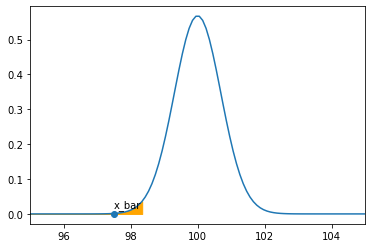

In [68]:
x_min = 95
x_max = 105


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std / sample_size**0.5


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = t.pdf(x,df=99,loc=mean,scale= std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the left and right critical values (Two tailed Test)
t_critical_left = pop_mean + (-t_critical * std)


# Shading the right rejection region
x2 = np.linspace(x_min,t_critical_left, 100)
y2 = t.pdf(x2,df=99,loc=mean,scale= std)
plt.fill_between(x2, y2, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.02))

In [70]:
if(np.abs(t) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


In [71]:
# Conclusion using p test
p_value=scipy.stats.t.sf(abs(-3.57), df=99)
if (p_value<0.05):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


<b>Interpretation : On average the Machine learning application takes less than 100 ms to predict for any future datapoint. 